In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r"C:\Users\elvynda\OneDrive - ADMINISTRADORA DE RIESGOS DE SALUD PALIC\Desktop\Proyect_comercial")
from APPS_PYTHON.risk_evaluation import evaluate_risk
from APPS_PYTHON.data_preprocessing import preprocess_data
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
data_training = pd.read_csv(r'C:\Users\elvynda\OneDrive - ADMINISTRADORA DE RIESGOS DE SALUD PALIC\Desktop\Proyect_comercial\Data\data_entrenamiento.csv')

In [10]:
# Asegurar que la columna "Churn" está correctamente codificada
if "Churn" in data_training.columns:
    data_training["Churn"] = data_training["Churn"].map({"Yes": 1, "No": 0})

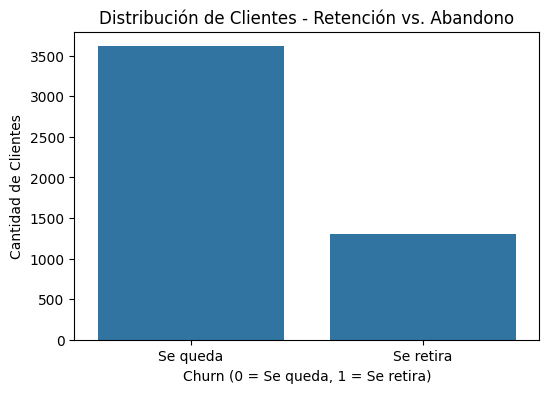

Churn
0    73.43
1    26.57
Name: proportion, dtype: float64

In [11]:
# Visualizar la distribución de clientes retenidos vs. los que abandonan
plt.figure(figsize=(6, 4))
sns.countplot(x=data_training["Churn"])
plt.title("Distribución de Clientes - Retención vs. Abandono")
plt.xlabel("Churn (0 = Se queda, 1 = Se retira)")
plt.ylabel("Cantidad de Clientes")
plt.xticks([0, 1], ["Se queda", "Se retira"])
plt.show()

# Calcular y mostrar porcentajes de retención y abandono
churn_counts = data_training["Churn"].value_counts(normalize=True) * 100
churn_counts.round(2)

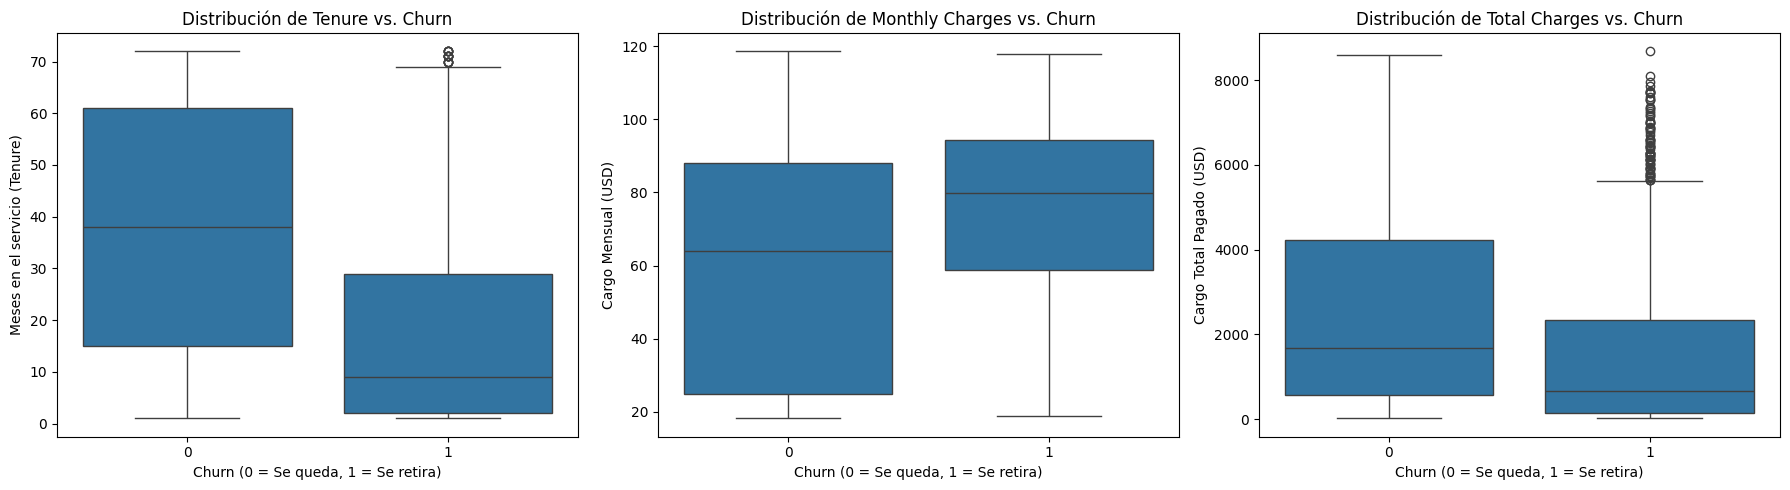

In [12]:
# Crear gráficos comparativos de variables numéricas vs. Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure vs Churn
sns.boxplot(x=data_training["Churn"], y=data_training["tenure"], ax=axes[0])
axes[0].set_title("Distribución de Tenure vs. Churn")
axes[0].set_xlabel("Churn (0 = Se queda, 1 = Se retira)")
axes[0].set_ylabel("Meses en el servicio (Tenure)")

# MonthlyCharges vs Churn
sns.boxplot(x=data_training["Churn"], y=data_training["MonthlyCharges"], ax=axes[1])
axes[1].set_title("Distribución de Monthly Charges vs. Churn")
axes[1].set_xlabel("Churn (0 = Se queda, 1 = Se retira)")
axes[1].set_ylabel("Cargo Mensual (USD)")

# TotalCharges vs Churn
sns.boxplot(x=data_training["Churn"], y=data_training["TotalCharges"], ax=axes[2])
axes[2].set_title("Distribución de Total Charges vs. Churn")
axes[2].set_xlabel("Churn (0 = Se queda, 1 = Se retira)")
axes[2].set_ylabel("Cargo Total Pagado (USD)")

plt.tight_layout()
plt.show()

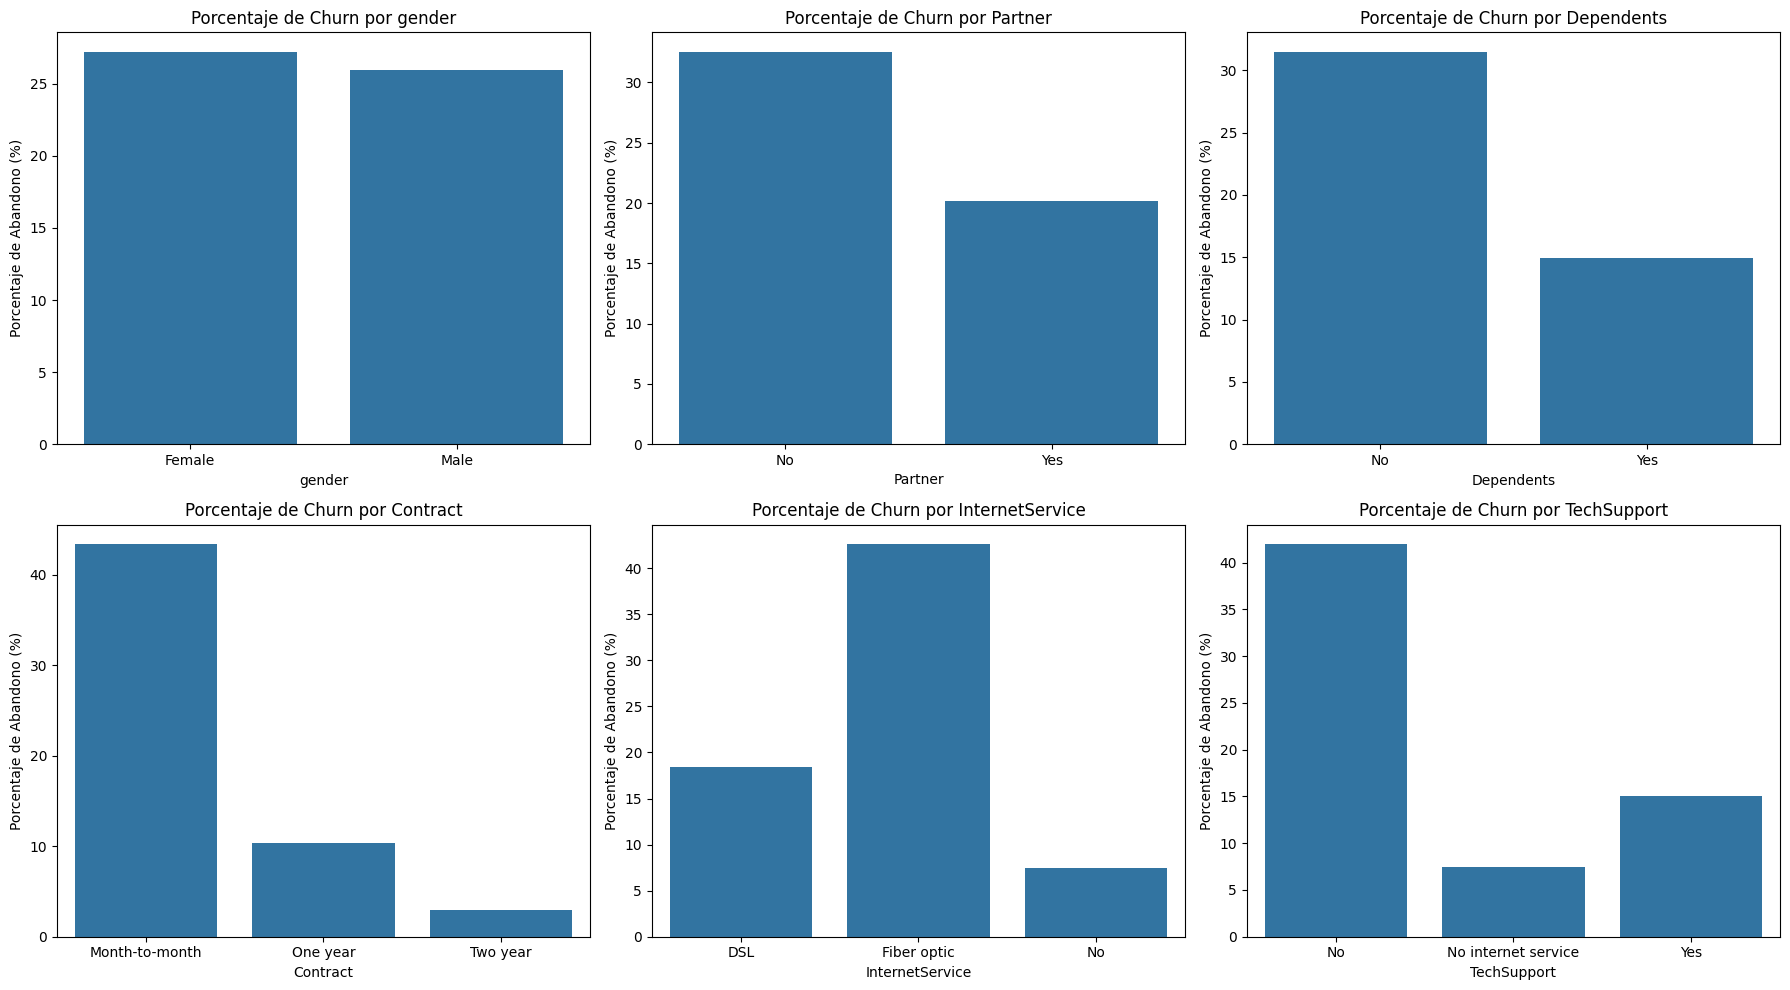

In [13]:
# Variables categóricas a analizar
categorical_features = ["gender", "Partner", "Dependents", "Contract", "InternetService", "TechSupport"]

# Crear gráficos de porcentaje de churn por categoría
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(categorical_features):
    row, col_idx = divmod(i, 3)
    churn_rates = data_training.groupby(col)["Churn"].mean() * 100
    sns.barplot(x=churn_rates.index, y=churn_rates.values, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Porcentaje de Churn por {col}")
    axes[row, col_idx].set_ylabel("Porcentaje de Abandono (%)")

plt.tight_layout()
plt.show()

In [22]:
# Aplicar transformación a los datos antes de la división
df_transformed = preprocess_data(data_training)

In [23]:
df_transformed

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,0.112676,0.401096,0.060120,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,True,True
1,0.0,0.352113,0.431490,0.180373,True,False,False,True,False,True,...,False,False,False,True,False,False,False,True,False,False
2,0.0,0.028169,0.515197,0.023263,False,False,False,True,False,False,...,True,False,True,True,False,True,False,True,False,False
3,0.0,0.084507,0.551570,0.057830,True,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,True
4,0.0,0.929577,0.420030,0.454059,True,True,True,True,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.0,0.028169,0.320379,0.013663,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4918,0.0,0.704225,0.929248,0.655947,False,False,False,True,False,True,...,True,False,True,True,False,True,False,True,False,False
4919,0.0,0.112676,0.626806,0.088346,True,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,False
4920,0.0,0.690141,0.014948,0.111955,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
